In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx



In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.head()

,text,sentiment
0,@angelemotion yayyy for new videos by amazing ...,happiness
1,Surgery when I wake up,neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise
3,Just look @ this hellacious desk...good grief ...,hate
4,@ModelTheany tee we beefin....what was u supp...,surprise


In [5]:
df['sentiment'].value_counts()

neutral       6910
worry         6767
happiness     4167
sadness       4132
love          3074
surprise      1750
fun           1421
relief        1221
hate          1058
empty          662
enthusiasm     607
boredom        143
anger           88
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

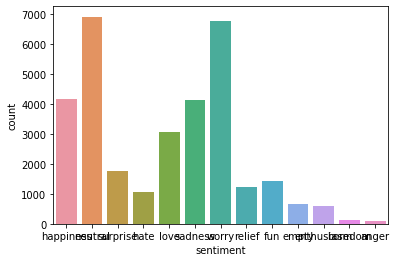

In [8]:
sns.countplot(x='sentiment',data=df)

Data Cleaning
Removing user handles and stopwords

In [14]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
df['clean_text']=df['text'].apply(nfx.remove_userhandles)


In [21]:
df['clean_text']=df['clean_text'].apply(nfx.remove_stopwords)

In [22]:
df['clean_text']=df['clean_text'].apply(nfx.remove_urls)

In [23]:
df['clean_text']=df['clean_text'].apply(nfx.remove_special_characters)

In [24]:
df

,text,sentiment,clean_text
0,@angelemotion yayyy for new videos by amazing ...,happiness,yayyy new videos amazing people
1,Surgery when I wake up,neutral,Surgery wake
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise,WAY MAN like 21 year olds
3,Just look @ this hellacious desk...good grief ...,hate,look hellacious deskgood grief
4,@ModelTheany tee we beefin....what was u supp...,surprise,tee beefinwhat u supposed leavin
...,...,...,...
31995,as any1 been up all night like me and now the ...,neutral,any1 night like birds keeping awake
31996,"Not going to Suffolk tomorrow. However, now ...",happiness,going Suffolk tomorrow However MB amp planning...
31997,i really wanna play....,happiness,wanna play
31998,"@DavidArchie Hey David, I'm wondering if you r...",happiness,Hey David Im wondering received letter song it...


In [25]:
x_features = df['clean_text']
y_labels = df['sentiment']

Spliting

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_labels,test_size=0.3,random_state=42)

Tokenize    

In [63]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts(x_features)

print(tokenizer.texts_to_sequences([x_features[3]]))


[[84, 1, 1, 4873]]


Padding

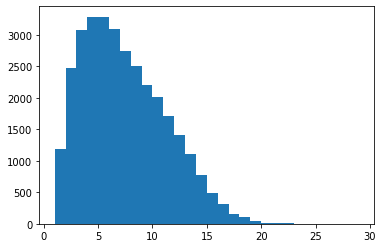

In [34]:
lengths = [len(t.split(' ')) for t in x_features]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [96]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=12, padding='post')
    return padded_sequences

In [97]:
padded_train_sequences = get_sequences(tokenizer, x_features)


In [98]:
padded_train_sequences[3]

array([  84,    1,    1, 4873,    0,    0,    0,    0,    0,    0,    0,
          0])

Labeling

In [99]:
classes = set(y_labels)
print(classes)


{'fun', 'enthusiasm', 'boredom', 'worry', 'happiness', 'neutral', 'relief', 'anger', 'love', 'sadness', 'surprise', 'hate', 'empty'}


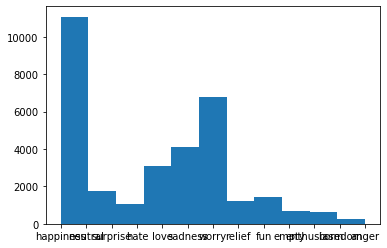

In [100]:
plt.hist(y_labels, bins=11)
plt.show()


In [101]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [102]:
classes_to_index


{'fun': 0,
 'enthusiasm': 1,
 'boredom': 2,
 'worry': 3,
 'happiness': 4,
 'neutral': 5,
 'relief': 6,
 'anger': 7,
 'love': 8,
 'sadness': 9,
 'surprise': 10,
 'hate': 11,
 'empty': 12}

In [49]:
index_to_classes


{0: 'fun',
 1: 'enthusiasm',
 2: 'boredom',
 3: 'worry',
 4: 'happiness',
 5: 'neutral',
 6: 'relief',
 7: 'anger',
 8: 'love',
 9: 'sadness',
 10: 'surprise',
 11: 'hate',
 12: 'empty'}

In [105]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [107]:
train_labels = names_to_ids(y_labels)
print(train_labels[115])


11


Splitting dataset

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_labels,test_size=0.3,random_state=42)

In [108]:
vocab_size = 10000
max_length = 12
embedding_dim = 16

Compiling the model

In [109]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')
    
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 12, 16)            160000    
                                                                 
 flatten_5 (Flatten)         (None, 192)               0         
                                                                 
 dense_10 (Dense)            (None, 6)                 1158      
                                                                 
Total params: 161,158
Trainable params: 161,158
Non-trainable params: 0
_________________________________________________________________


In [81]:
val_tweets = x_test
val_labels =y_test

val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [82]:
df.isnull().sum()

text          0
sentiment     0
clean_text    0
dtype: int64

In [110]:
history = model.fit(
    padded_train_sequences, train_labels,
    epochs=50,
    verbose=1,
    validation_split=0.1
    )


Epoch 1/50
229/900 [======>.......................] - ETA: 11s - loss: nan - accuracy: 0.0465

KeyboardInterrupt: 